In [1]:
#เตรียมการ library
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 30
print(cv2.__version__)

3.3.0


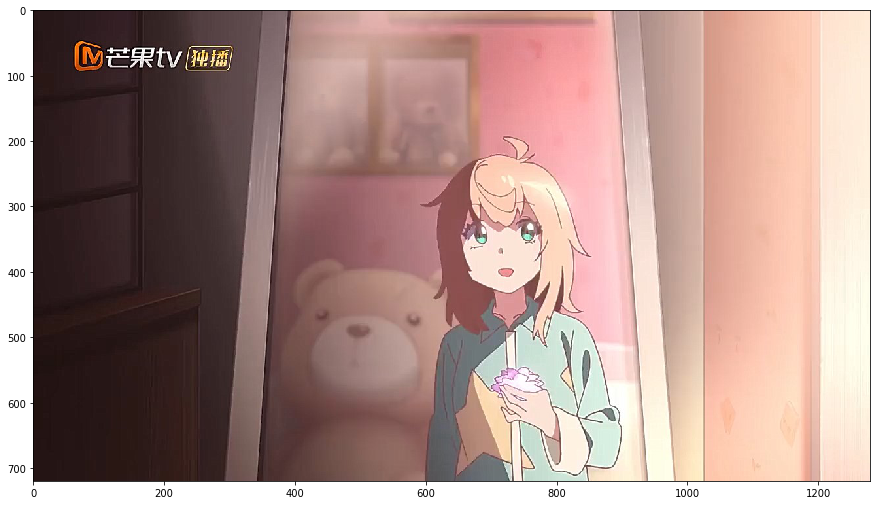

In [2]:
#ขั้น 0: โหลดรูปภาพต้นฉบับ
ori_image = cv2.imread("images/ENCLAVE_FAILED_01.jpg")
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB) # cv2 use bgr but plt use rgb
plt.imshow(ori_image)

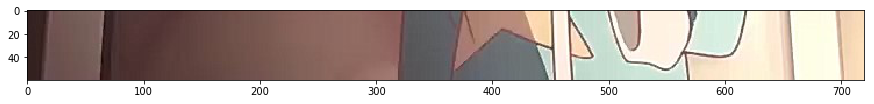

In [3]:
#ขั้น 1:ตัดเฟรมเฉพาะส่วนที่มีซับ
subtitle_frame = ori_image[660:720,280:1000]
plt.imshow(subtitle_frame)

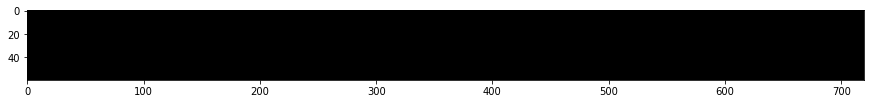

In [4]:
#ขั้น 2: เลือกเฉพาะสีดำ
subtitle_black = cv2.inRange(subtitle_frame, (0,0,0), (20,20,20))
plt.imshow(subtitle_black,cmap = plt.cm.gray)

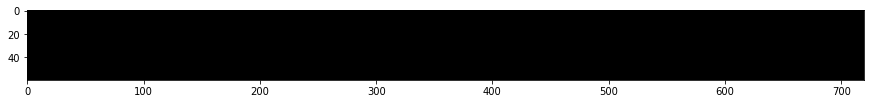

In [5]:
#ขั้นที่ 3: ถมดำที่ขอบเพื่อให้รู้ว่าเป็นสีดำที่อยู่ในสีขาว
frame_height,frame_width = subtitle_black.shape 
mask_flood = np.zeros((frame_height+2, frame_width+2), np.uint8)
for y in range(0,frame_height):
    cv2.floodFill(subtitle_black,mask_flood,(0,y),0)
    cv2.floodFill(subtitle_black,mask_flood,(frame_width-1,y),0)
for x in range(0,frame_width):
    cv2.floodFill(subtitle_black,mask_flood,(x,0),0)
    cv2.floodFill(subtitle_black,mask_flood,(x,frame_height-1),0)
plt.imshow(subtitle_black,cmap = plt.cm.gray)

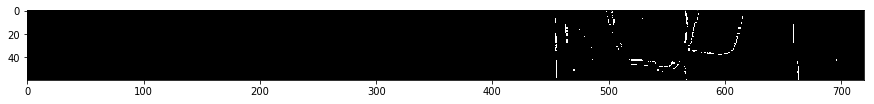

In [39]:
#ขั้นที่ 4: เลือกเฉพาะสีขาว
subtitle_white = cv2.inRange(subtitle_frame, (245,245,245), (255,255,255))
plt.imshow(subtitle_white,cmap = plt.cm.gray)

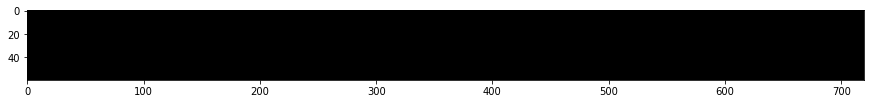

In [8]:
#ขั้นที่ 5: ทำการสลับสีขาวเป็นดำ
subtitle_black_invert = cv2.bitwise_not(subtitle_black)
plt.imshow(subtitle_black_invert,cmap = plt.cm.gray)

In [43]:
#ขั้นที่ 6: นำจากขั้นที่ 4 และขั้นที่ 5 ที่มีสีขาวเหมือนกันมา เลือกเฉพาะที่เป็นสีขาวที่ถูกสีดำที่ล้อม
#interested_subtitle = cv2.bitwise_and(subtitle_black_invert,subtitle_white)
#plt.imshow(interested_subtitle,cmap = plt.cm.gray)
print(subtitle_black_invert[7:8,455:456])
print(subtitle_white[7:8,455:456])

[[255]]
[[0]]


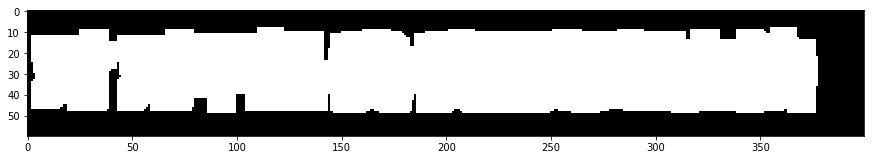

In [37]:
#ขั้น 7 ทำการขยายขอบเพื่อให้ปกคลุมทั้งหมด
subtitle_stoke = cv2.dilate(interested_subtitle,np.ones((13,13)))
plt.imshow(subtitle_stoke,cmap = plt.cm.gray)

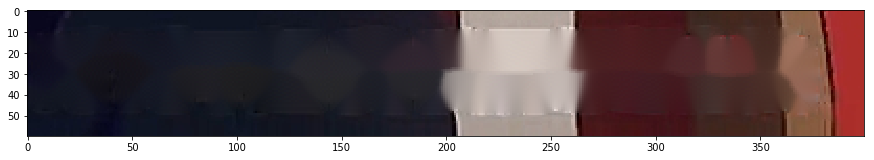

In [45]:
#ขั้นที่ 8 ทำ inpainting เพื่อลบซับ
tofix_image = subtitle_frame.copy()
fixed_subtitle = cv2.inpaint(tofix_image,subtitle_stoke,3,cv2.INPAINT_TELEA)
plt.imshow(fixed_subtitle)

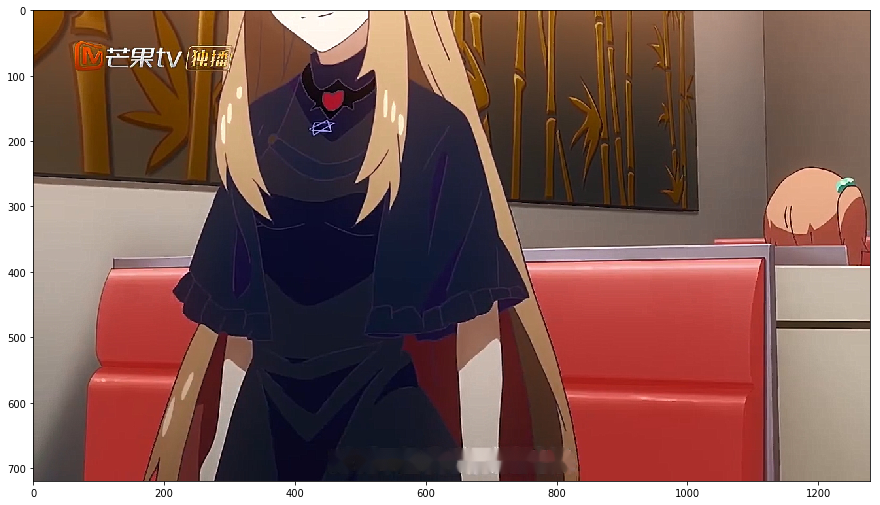

In [44]:
#ขั้นที่ 9 นำกลับมารวมกับภาพหลัก
result_image = ori_image.copy()
result_image[660:720,450:850] = fixed_image
plt.imshow(result_image)